In [5]:
!pip install tensorflow matplotlib


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import tensorflow as tf

In [7]:
from tensorflow import keras

In [8]:
import matplotlib.pyplot as plt

In [9]:
import random

In [10]:
import numpy as np

In [16]:
import os

# Load CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print shapes of dataset arrays
for i, name in zip((x_train, y_train, x_test, y_test), ('x_train', 'y_train', 'x_test', 'y_test')):
    print(f"{name} shape:", i.shape)

# List files in dataset folder
dataset_folder = 'D:/DL Prac/cifar-10-img/cifar-10-img'
print("\nFiles in dataset folder:", os.listdir(dataset_folder))

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)

Files in dataset folder: ['test', 'train']


[6]


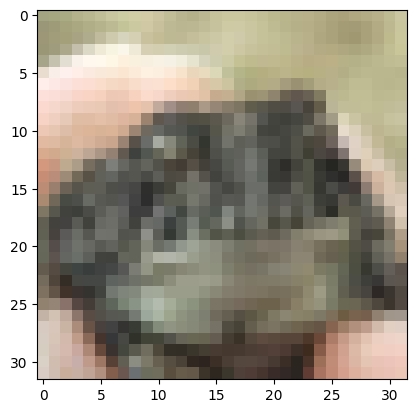

In [17]:
plt.imshow(x_train[25])
print(y_train[25])
plt.show()

In [18]:
#scaling the values
x_train = x_train/255
x_test = x_test/255
# 0/255 = 255
#255/255 = 1 maximum value

In [19]:
print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [20]:
num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [21]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [22]:

print(y_train.shape, y_test.shape)


(50000, 10) (10000, 10)


In [24]:
from tensorflow import keras

# Create a sequential model
model = keras.Sequential()

# Define the input layer
model.add(keras.layers.Input(shape=(32, 32, 3)))

# Convolutional layers
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

# Fully connected layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))  # 10 classes for classification

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to check the architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Training the model
history = model.fit(x_train, y_train,
              batch_size=30,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2054 - loss: 2.1434 - val_accuracy: 0.3427 - val_loss: 1.7987
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3744 - loss: 1.7304 - val_accuracy: 0.4559 - val_loss: 1.5165
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4566 - loss: 1.5070 - val_accuracy: 0.4866 - val_loss: 1.4129
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.5054 - loss: 1.3774 - val_accuracy: 0.5273 - val_loss: 1.3106
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5465 - loss: 1.2791 - val_accuracy: 0.5579 - val_loss: 1.2388
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.5745 - loss: 1.2066 - val_accuracy: 0.5799 - val_loss: 1.1957
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5992 - loss: 1.1397 - val_accuracy: 0.5904 - val_loss: 1.1530
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6225 - loss: 1

In [27]:
pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---------- ---------------------------- 81.9/294.9 kB 286.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 286.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 297.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 297.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 297.7 kB/s eta 0:00:01
   --------------------- ---------------- 163.8/294.9 kB 327.5 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 357.9 kB/s eta 0:00:01
   ------


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import seaborn as sns


In [29]:
!pip install seaborn



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

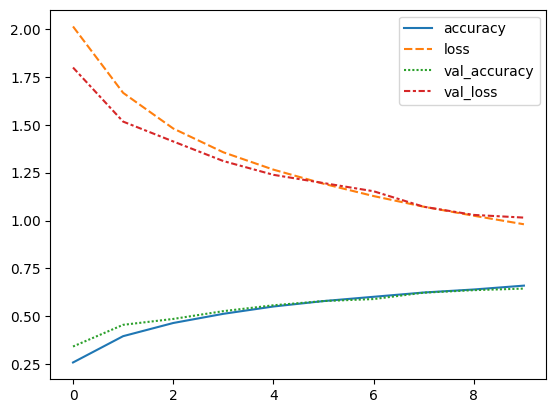

In [30]:
sns.lineplot(model.history.history)

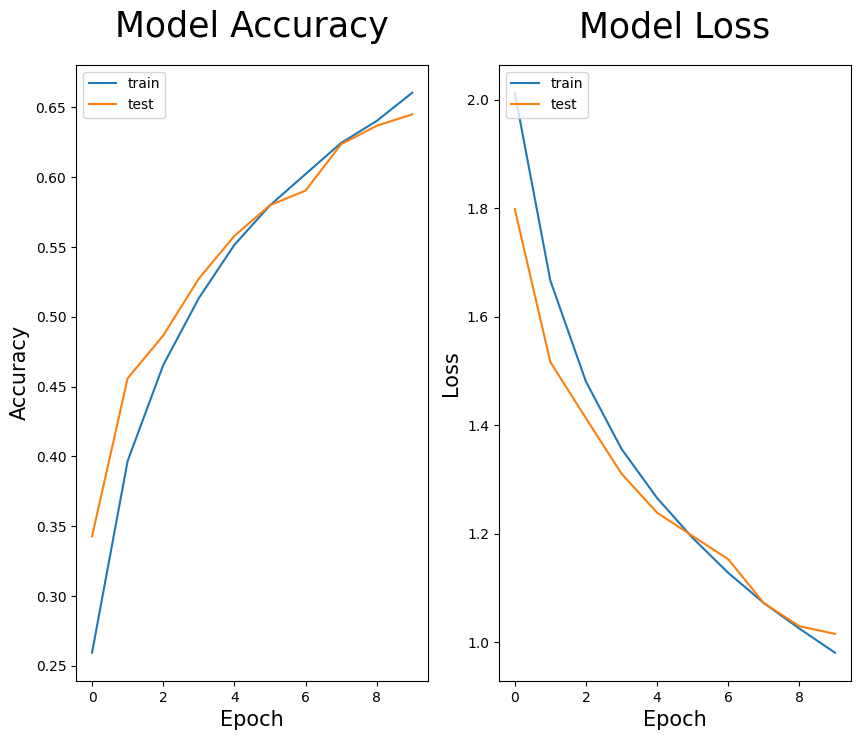

In [31]:
# Plotting the Model Accuracy & Model Loss vs Epochs
plt.figure(figsize=[10,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')


# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [33]:

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

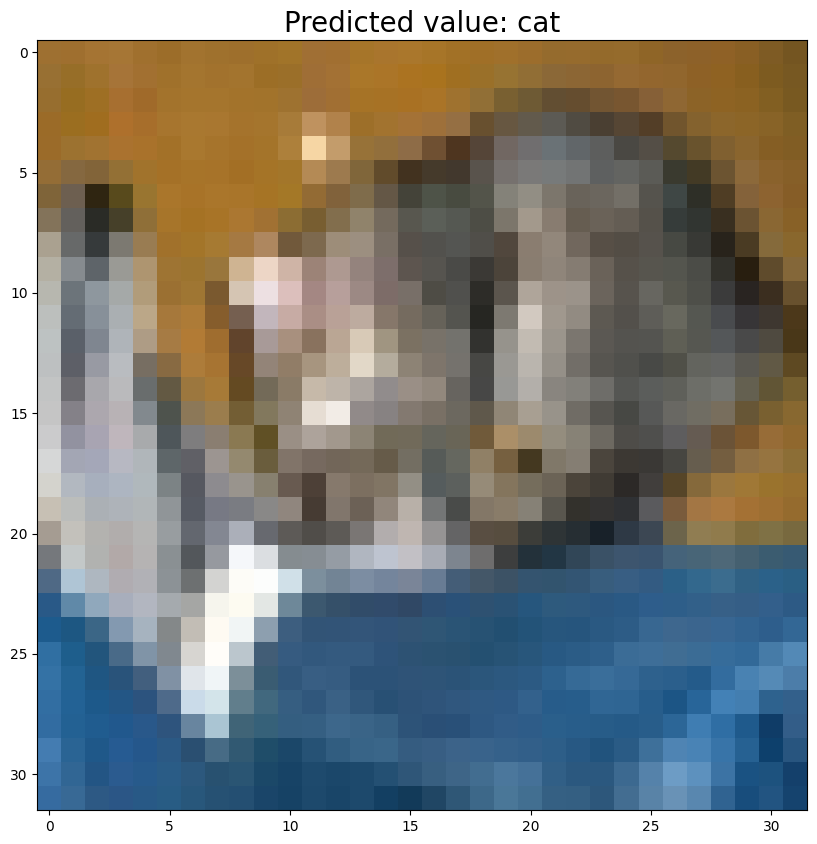

In [34]:
plt.figure(figsize=[10,10])
plt.imshow(x_test[0].reshape(32, 32, -1))
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[0], axis=0)]), size=20)
plt.grid(False)

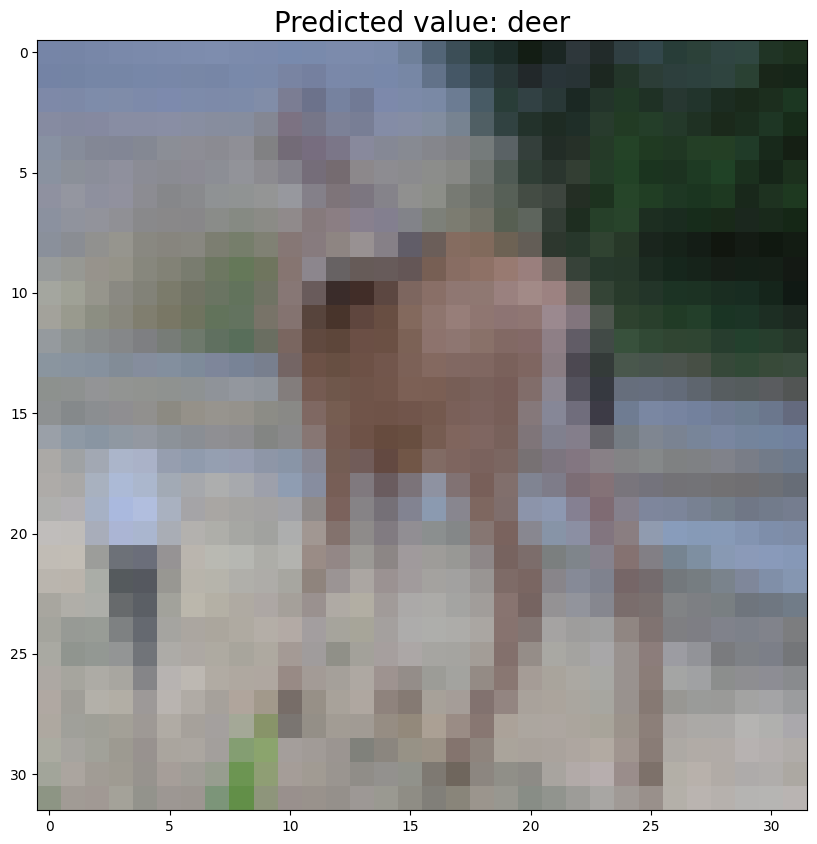

In [35]:
plt.figure(figsize=[10,10])
plt.imshow(x_test[100].reshape(32, 32, -1))
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[100], axis=0)]), size=20)
plt.grid(False)
     